<a href="https://colab.research.google.com/github/martindevoto/machine-learning-notebooks-personal/blob/main/TF_y_Keras_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
# Clave para dividir tu dataset en train y test
from sklearn.preprocessing import MinMaxScaler
# Clave para poder usar el "normalizador" de MinMax
from sklearn.metrics import mean_squared_error, mean_absolute_error,explained_variance_score

%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
df = pd.read_csv('/content/drive/My Drive/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.isnull().sum()

# Reminder de cuando queres buscar nulls

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


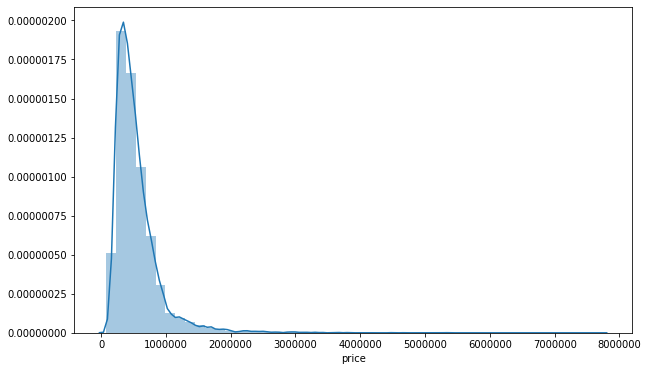

In [ ]:
plt.figure (figsize =(10,6))
sns.distplot(df['price'])


In [ ]:
df.shape

(21597, 21)

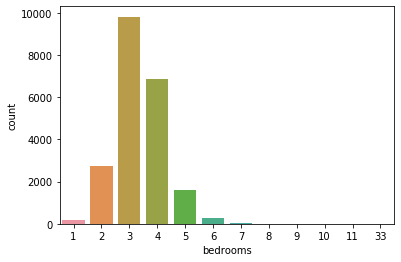

In [ ]:
sns.countplot(df['bedrooms'])

In [ ]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

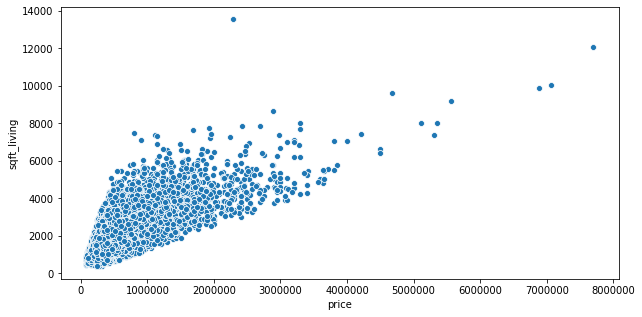

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='price',y='sqft_living',data=df)

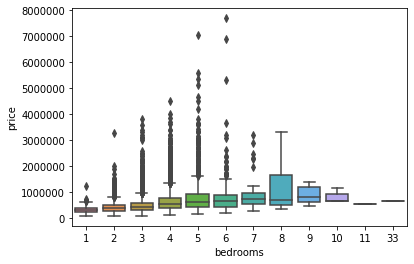

In [ ]:
sns.boxplot(x='bedrooms',y='price',data=df)

In [ ]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

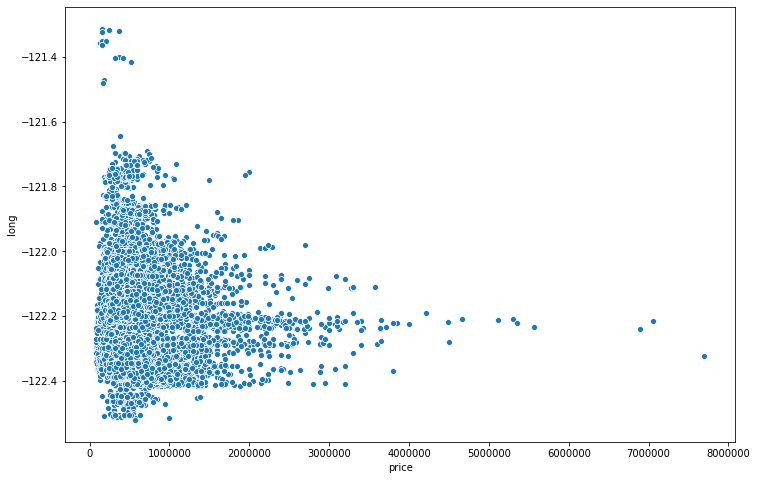

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price',y='long',data=df)

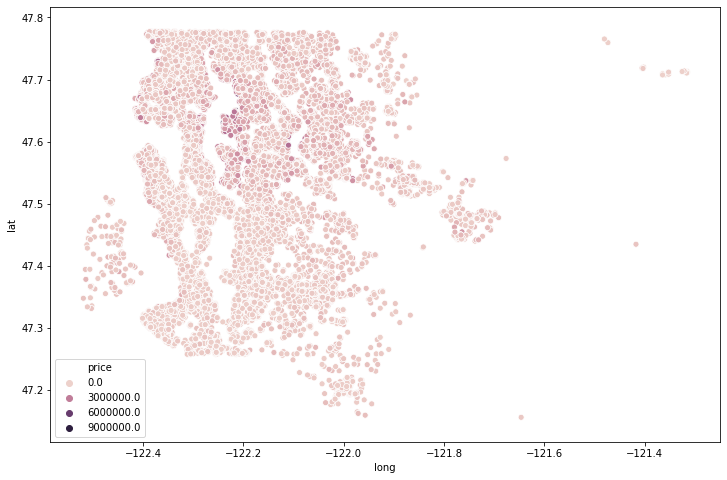

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price')

In [ ]:
df.sort_values('price',ascending=False).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750


In [ ]:
len(df)*0.01

215.97

In [ ]:
non_top_1_perc = df.sort_values('price',ascending=False).iloc[216:]

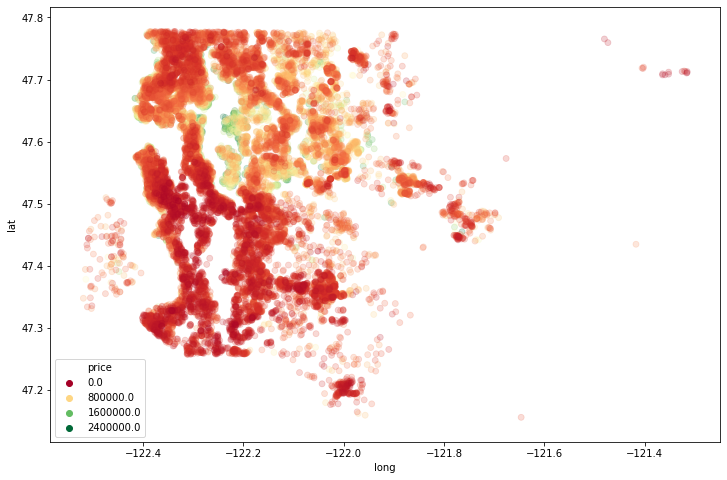

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=non_top_1_perc,
                edgecolor=None,alpha=0.2,palette='RdYlGn',hue='price')

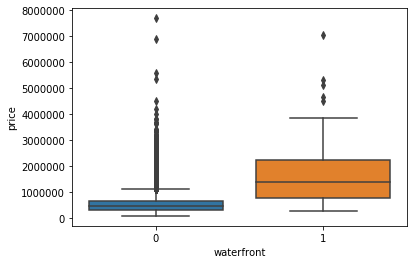

In [ ]:
sns.boxplot(x='waterfront',y='price', data=df)

In [ ]:
df = df.drop('id',axis=1)

In [ ]:
df['date']=pd.to_datetime(df['date'])

# Truquito para convertire a datetime

In [ ]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [ ]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

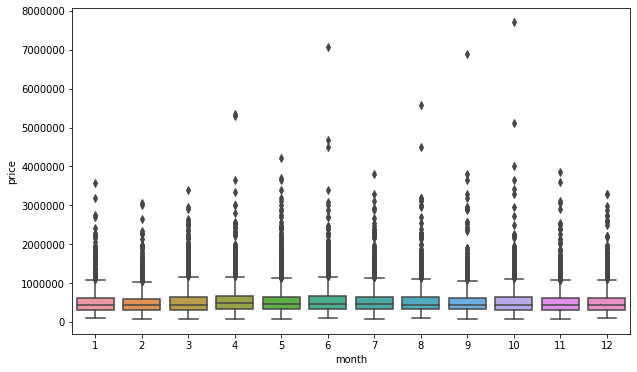

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='month',y='price',data=df)

In [ ]:
df.groupby('month').mean()['price']

month
1     525963.251534
2     508520.051323
3     544057.683200
4     562215.615074
5     550849.746893
6     557534.318182
7     544892.161013
8     536655.212481
9     529723.517787
10    539439.447228
11    522359.903478
12    524799.902041
Name: price, dtype: float64

In [ ]:
df = df.drop('date',axis = 1)

In [ ]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [ ]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [ ]:
X = df.drop('price', axis=1).values
y= df['price'].values

# Acordarse del .values para convertir los features y los labels a array
# de NumPy


In [ ]:
type(X)

numpy.ndarray

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
model = Sequential()

model.add(Dense(19,activation='relu'))
# La primer layer deberia tener una cantidad de neuronas igual a la cantidad de
# features
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
# Es poner Dense(los parametros de cada neurona de esa capa)

model.add(Dense(1,activation='relu'))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test), batch_size = 128,epochs=400)


# Se suelen armar batch_size de potencias de 2
# Cuanto mas chico el batch size, más tarda el modelo en entrenarse
# Cuanto más chico el batch size, menos chances tenes de overfittear

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 15117 samples, validate on 6480 samples
Epoch 1/400
15117/15117 [==============================] - 1s 53us/sample - loss: 430244902771.7817 - val_loss: 418947060915.5161
Epoch 2/400
15117/15117 [==============================] - 0s 16us/sample - loss: 429689958475.0541 - val_loss: 417077764803.9506
Epoch 3/400
15117/15117 [==============================] - 0s 18us/sample - loss: 422368686794.5037 - val_loss: 400301232967.4272
Epoch 4/400
15117/15117 [==============================] - 0s 16us/sample - loss: 383980864966.3208 - val_loss: 333784165601.0272
Epoch 5/400
15117/15117 [==============================] - 0s 18us/sample - loss: 281787909929.8115 - val_loss: 203463710886.8741
Epoch 6/400
15117/15117 [==============================] - 0s 17us/sample - loss: 154601661481.9300 - val_loss: 109749382247.6642
Epoch 7/400
15117/15117 [==============================] - 0s 17us/sample - loss: 10450591

In [ ]:
losses = pd.DataFrame(model.history.history)

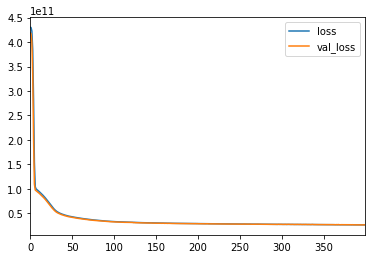

In [ ]:
losses.plot()

# Si val_loss se hubiese disparado luego de K epochs,
# eso hubiese sido un indicativo de que estas overfitteando

In [ ]:
predictions = model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, predictions))

163481.78276439584

In [ ]:
mean_absolute_error(y_test,predictions)

101682.71785903742

In [ ]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [ ]:
5.402966e+05

540296.6

In [ ]:
explained_variance_score(y_test,predictions)

0.7988682052196546

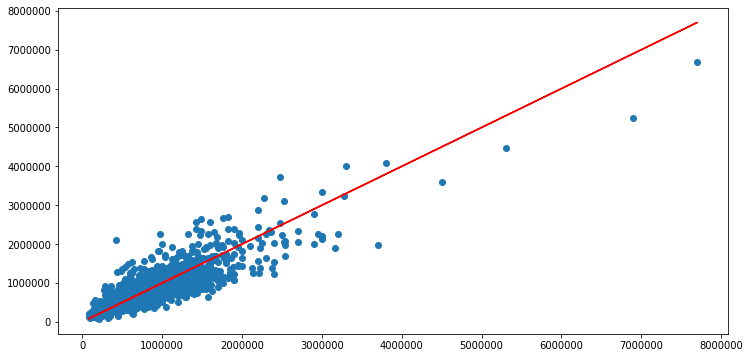

In [ ]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [ ]:
single_house = df.drop('price',axis=1).iloc[0]